In [34]:
from util.io.ffr import *
from matplotlib import pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal
from scipy.fft import fftshift
from bids import BIDSLayout
from statsmodels.stats.anova import AnovaRM

In [35]:
def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, desc = desc
        )
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

In [36]:
def compute_spectrum_dB(epo):
    import numpy
    '''
    Computes power spectrum of frequency following response
    '''
    # assert(epo.tmin == -epo.tmax)
    TMAX = abs(epo.tmin)
    poststim = epo.average().compute_psd(tmin = 0., tmax = TMAX)
    baseline = epo.average().compute_psd(tmin = epo.tmin, tmax = 0.)
    power = 10 * numpy.log10(poststim.get_data() / baseline.get_data())
    power = numpy.squeeze(power)
    return poststim.freqs, power

In [37]:
# # Look at FFR by target tone identity
# BIDS_ROOT = '../data/bids'
# layout = BIDSLayout(BIDS_ROOT, derivatives = True)
# subs = layout.get_subjects(scope = 'preprocess_ffr')
# subs.sort(key = int)
# spectrums = []
# conditions = ['11', '12', '13', '21', '22', '23', '31', '32', '33']
# stim_dict = {'1': 130,
#              '2': 200,
#              '3': 280}

# for sub in subs:
#     print(sub)
        
#     # Read epochs object
#     epochs = read_epochs(sub, 'forFFR')

#     # Iterate over conditions
#     for condition in conditions:
#         print(f'target: {stim_dict[condition[0]]}')
#         print(f'stimulus: {stim_dict[condition[1]]}')
        
#         # Compute power in dB
#         freqs, power = compute_spectrum_dB(epochs[condition])
#         df = pd.DataFrame(
#             {'subject': sub,
#              'target': stim_dict[condition[0]],
#              'stimulus': stim_dict[condition[1]],
#              'frequency': poststim.freqs,
#              'power': power
#             }
#         )
#         spectrums.append(df)
    
# # Create dataframe and save
# spectrums = pd.concat(spectrums)
# spectrums.to_csv('spectrums2.csv', index = False)
spectrums.to_csv('spectrums2.csv', index = False)

In [39]:
palette_tab10 = sns.color_palette("tab10", 10)

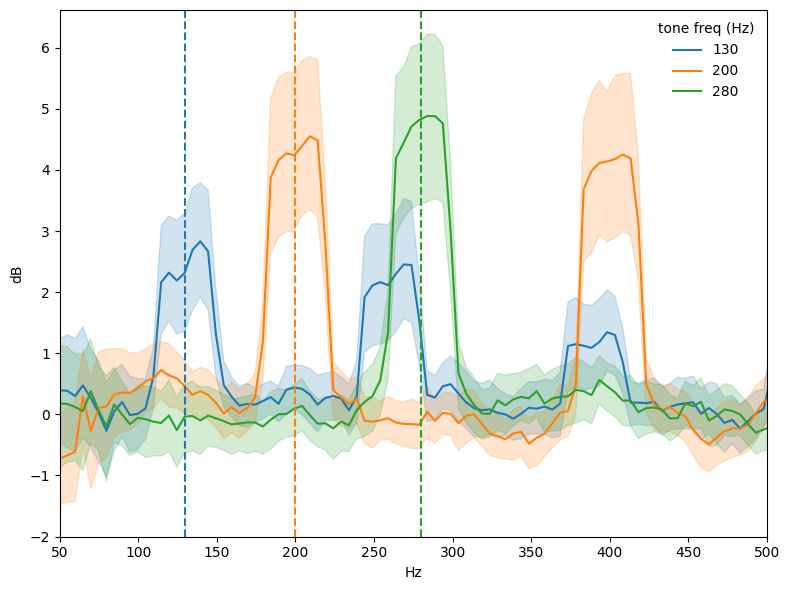

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
spectrums_sub = spectrums.groupby(['subject', 'stimulus', 'frequency'], as_index=False)['power'].mean()
graph = sns.lineplot(data = spectrums_sub, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
graph.axvline(130, linestyle = 'dashed', color = palette_tab10[0])
graph.axvline(200, linestyle = 'dashed', color = palette_tab10[1])
graph.axvline(280, linestyle = 'dashed', color = palette_tab10[2])
graph.set_ylabel("dB")
graph.set_xlabel("Hz")
graph.set_xlim(50, 500)
# graph.set_ylim(-2, 9)
plt.legend(frameon=False, title = 'tone freq (Hz)')
plt.tight_layout()
# plt.savefig('../figs/FFR.png')

### By target

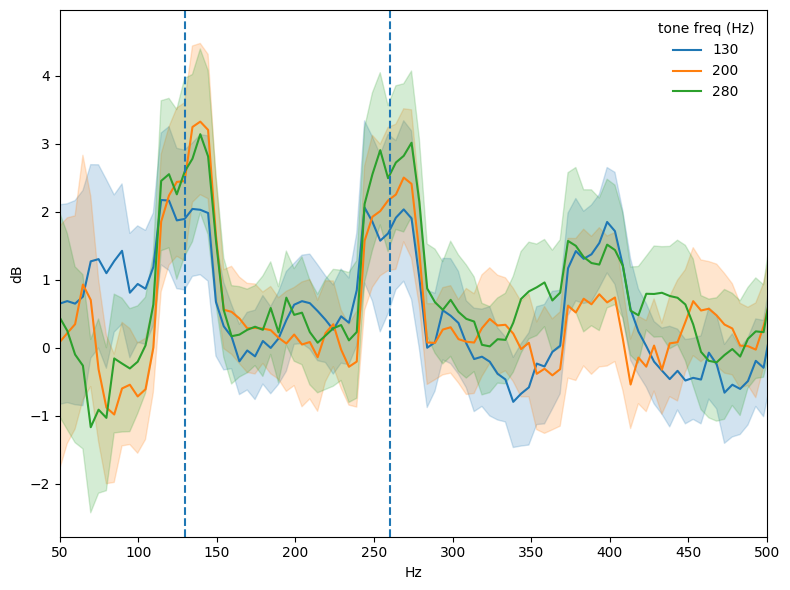

In [51]:
spectrums_tone = spectrums[spectrums.stimulus == 130]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums_tone, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(130, linestyle = 'dashed', color = palette_tab10[0])
graph.axvline(260, linestyle = 'dashed', color = palette_tab10[0])
graph.set_ylabel("dB")
graph.set_xlabel("Hz")
graph.set_xlim(50, 500)
# graph.set_ylim(-2, 9)
plt.legend(frameon=False, title = 'tone freq (Hz)')
plt.tight_layout()
# plt.savefig('../figs/FFR.png')

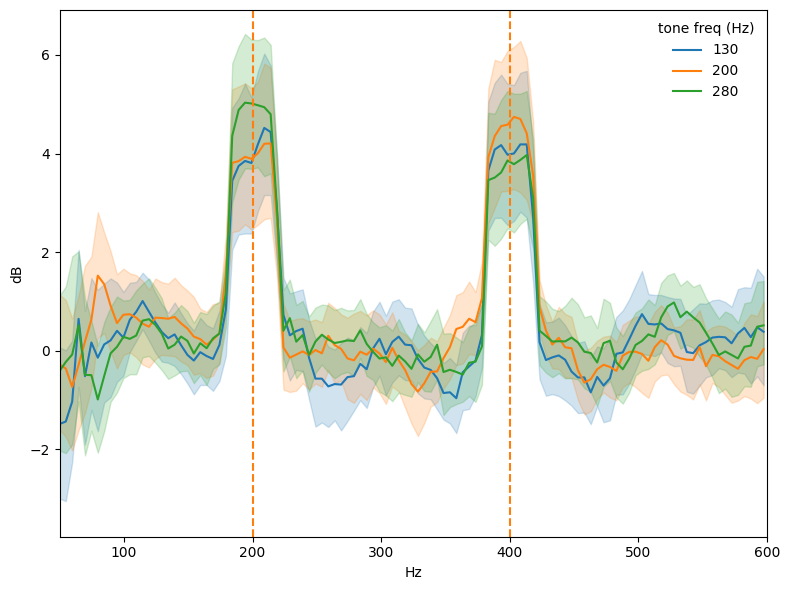

In [52]:
spectrums_tone = spectrums[spectrums.stimulus == 200]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums_tone, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(200, linestyle = 'dashed', color = palette_tab10[1])
graph.axvline(400, linestyle = 'dashed', color = palette_tab10[1])
graph.set_ylabel("dB")
graph.set_xlabel("Hz")
graph.set_xlim(50, 600)
# graph.set_ylim(-2, 9)
plt.legend(frameon=False, title = 'tone freq (Hz)')
plt.tight_layout()
# plt.savefig('../figs/FFR.png')

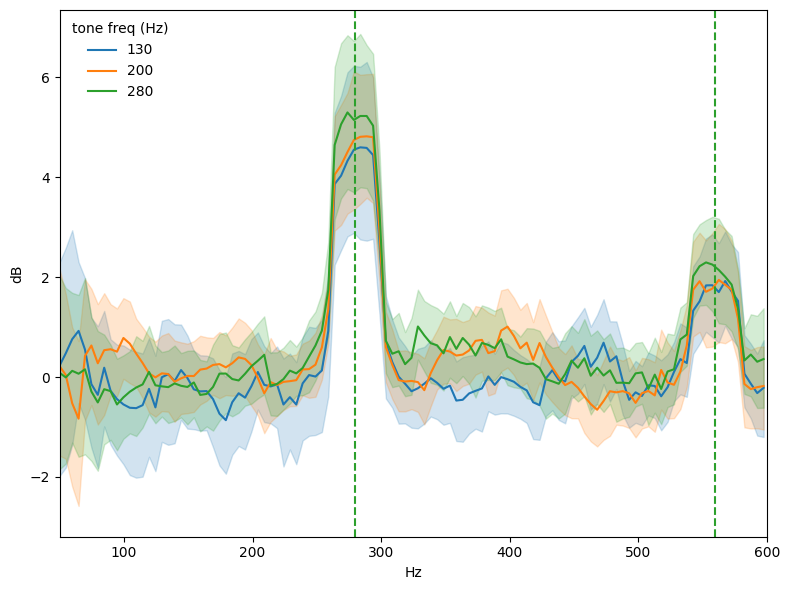

In [53]:
spectrums_tone = spectrums[spectrums.stimulus == 280]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums_tone, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(280, linestyle = 'dashed', color = palette_tab10[2])
graph.axvline(560, linestyle = 'dashed', color = palette_tab10[2])
graph.set_ylabel("dB")
graph.set_xlabel("Hz")
graph.set_xlim(50, 600)
# graph.set_ylim(-2, 9)
plt.legend(frameon=False, title = 'tone freq (Hz)')
plt.tight_layout()
# plt.savefig('../figs/FFR.png')